# WBC Classification

In [1]:
#Blood cell subtype classification
#import pandas as pd
import cv2 as cv # allows you to perform image processing and computer vision tasks
import numpy as np # used for working with arrays
import matplotlib.pyplot as plt # used to create 2D graphs and plots by using python scripts
import os #  provides the facility to establish the interaction between the user and the operating system
import seaborn as sns # Seaborn is the extended version of Matplotlib


from keras.models import Sequential,Model
from keras import layers
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers  import BatchNormalization

import tensorflow as tf
from keras import Model
from sklearn.metrics import accuracy_score, classification_report
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

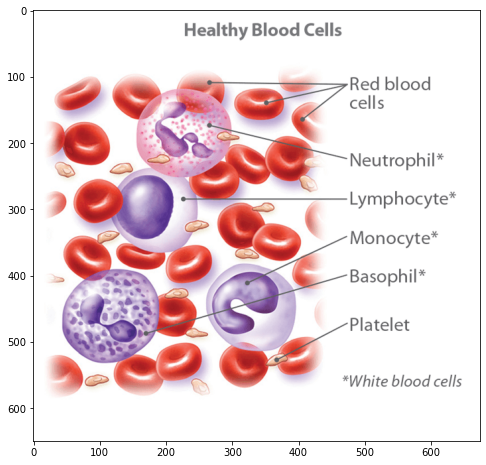

In [47]:
Blood_cell = cv.imread("C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/IMAGES/Healthy-Blood-Cells.png")
Blood_cell = cv.cvtColor(Blood_cell,cv.COLOR_BGR2RGB)
plt.figure(figsize= (8,10))
plt.imshow(Blood_cell)

# Reading Direction

In [3]:
train_path =('C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN')
test_sample_path = ('C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE')

In [4]:
CATEGORIES=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

(240, 320, 3)


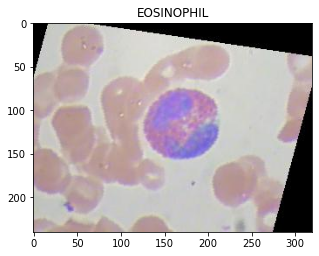

(240, 320, 3)


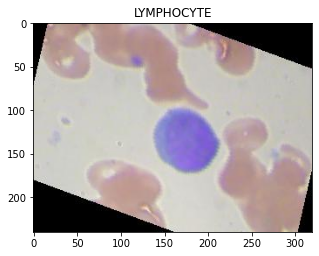

(240, 320, 3)


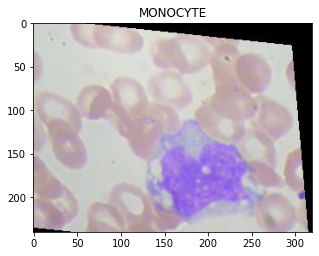

(240, 320, 3)


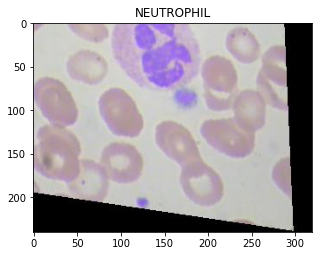

In [50]:
#reading original image from directory
# os.listdir() method in python is used to get the list of all files and directories in the specified directory.

for category in CATEGORIES:
        label=CATEGORIES.index(category)
       # print(label)
        path=os.path.join(train_path,category) #eosinophil
        
        for img_file in os.listdir(path):  # first image, all images of eosinophil 0 to n subfolder
            
            # 1 indicates read image in BGR scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1) # first image from the eosinophil
            
            #open cv read image in BGR format 
            #below we convert it to RGB format
            img2=cv.cvtColor(img,cv.COLOR_BGR2RGB)

            print(img2.shape)

            plt.figure(figsize= (5,5))
            plt.title(category)
            plt.imshow(img2)
            plt.show()
            break
            
        #plotting single image from each folder

(100, 100, 3)


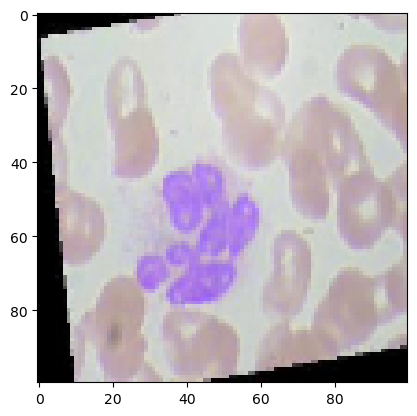

In [7]:
EOSINOPHIL = cv.imread("C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg")
EOSINOPHIL = cv.cvtColor(EOSINOPHIL,cv.COLOR_BGR2RGB) # changing BGR to RGB
image = cv.resize(EOSINOPHIL, (100,100)) # Resising image

plt.imshow(image)

print(image.shape)

In [5]:
#randomly rotate images through any degree between 0 and 360
# indicate the percentage of width or height of the image to shift.
# lipping along the vertical or the horizontal axis

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest', validation_split=0.25) # receive new variations of images


validation_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 20

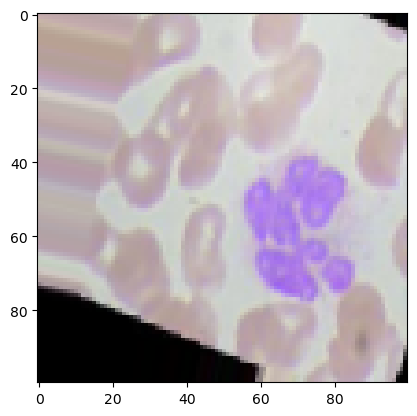

In [8]:
plt.imshow(train_data
           gen.random_transform(image)) # reading augmented images

In [9]:
#The flow_from_directory() method allows you to read the images directly from the directory and augment them 
#while the neural network model is learning on the training data.

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(100, 100),
        batch_size=train_batchsize,
        class_mode='categorical', subset = "training")
 
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(100, 100),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
    subset='validation') 

Found 7470 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [55]:
test_sample_generator = validation_datagen.flow_from_directory(
        test_sample_path,
        target_size=(100, 100),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 71 images belonging to 4 classes.


In [2]:
#VGG16 is a pre-trained CNN that can be used as a functional API in Keras, a popular deep learning library.
# whether to include the 3 fully-connected layers at the top of the network.

vgg = VGG16(input_shape = (100,100,3) , include_top=False , weights='imagenet')

for layer in vgg.layers:
    layer.trainable = False

In [57]:
#load the pre-trained VGG16 model using the keras.applications.vgg16.VGG16 class,
#and then use it as a functional API to build your own deep learning models

x = layers.Flatten()(vgg.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(64,activation='relu')(x) # first fully connected layer
x = layers.Dropout(0.2)(x)  # dropout layer

x = layers.Dense(128,activation='relu')(x)  # second fully connected layer
x = layers.Dropout(0.2)(x)

x = layers.Dense(64,activation='relu') (x) # third fully connected layer 
x = layers.Dropout(0.2)(x)



outputs = layers.Dense(4,activation='softmax')(x) # output layer

model = Model(inputs=vgg.input , outputs = outputs)

In [58]:
model.summary() # input data with a variable batch size

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [59]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
#Callback to save the Keras model or model weights at some frequency.
#so the model or weights can be loaded later to continue the training from the state saved.
# Stop training when a monitored metric has stopped improving.



checkpoint_filepath = '/tmp/checkpoint/vgg16'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose= 1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [78]:
history = model.fit(
      train_generator,
      steps_per_epoch=373 ,
      epochs=50,
      validation_data=validation_generator,
      verbose=1, callbacks=[checkpoint,earlystopping])

C:\Users\pramod\AppData\Local\Temp/ipykernel_35596/2348417816.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
373/373 [==============================] - ETA: 0s - loss: 1.2621 - acc: 0.4181
Epoch 1: val_loss improved from inf to 1.08777, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 303s 811ms/step - loss: 1.2621 - acc: 0.4181 - val_loss: 1.0878 - val_acc: 0.5376
Epoch 2/50
373/373 [==============================] - ETA: 0s - loss: 1.0437 - acc: 0.5462
Epoch 2: val_loss improved from 1.08777 to 0.84878, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 277s 744ms/step - loss: 1.0437 - acc: 0.5462 - val_loss: 0.8488 - val_acc: 0.6618
Epoch 3/50
373/373 [==============================] - ETA: 0s - loss: 0.9359 - acc: 0.6101
Epoch 3: val_loss improved from 0.84878 to 0.77922, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 283s 760ms/step - loss: 0.9359 - acc: 0.6101 - val_loss: 0.7792 - val_acc: 0.6795
Epoch 4/50
373/373 [==============================] - ETA: 0s - loss: 0.8733 - acc: 0.6494
Epoch 4: val_loss improved from 0.77922 to 0.70251, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 295s 790ms/step - loss: 0.8733 - acc: 0.6494 - val_loss: 0.7025 - val_acc: 0.7226
Epoch 5/50
373/373 [==============================] - ETA: 0s - loss: 0.8239 - acc: 0.6693
Epoch 5: val_loss improved from 0.70251 to 0.70202, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 282s 757ms/step - loss: 0.8239 - acc: 0.6693 - val_loss: 0.7020 - val_acc: 0.7125
Epoch 6/50
373/373 [==============================] - ETA: 0s - loss: 0.7854 - acc: 0.6821
Epoch 6: val_loss improved from 0.70202 to 0.65906, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 278s 745ms/step - loss: 0.7854 - acc: 0.6821 - val_loss: 0.6591 - val_acc: 0.7262
Epoch 7/50
373/373 [==============================] - ETA: 0s - loss: 0.7448 - acc: 0.6997
Epoch 7: val_loss improved from 0.65906 to 0.60397, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 332s 890ms/step - loss: 0.7448 - acc: 0.6997 - val_loss: 0.6040 - val_acc: 0.7527
Epoch 8/50
373/373 [==============================] - ETA: 0s - loss: 0.7042 - acc: 0.7156
Epoch 8: val_loss did not improve from 0.60397
373/373 [==============================] - 344s 921ms/step - loss: 0.7042 - acc: 0.7156 - val_loss: 0.6136 - val_acc: 0.7591
Epoch 9/50
373/373 [==============================] - ETA: 0s - loss: 0.6942 - acc: 0.7305
Epoch 9: val_loss improved from 0.60397 to 0.56823, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 336s 902ms/step - loss: 0.6942 - acc: 0.7305 - val_loss: 0.5682 - val_acc: 0.7732
Epoch 10/50
373/373 [==============================] - ETA: 0s - loss: 0.6578 - acc: 0.7369
Epoch 10: val_loss improved from 0.56823 to 0.53096, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 352s 944ms/step - loss: 0.6578 - acc: 0.7369 - val_loss: 0.5310 - val_acc: 0.7728
Epoch 11/50
373/373 [==============================] - ETA: 0s - loss: 0.6373 - acc: 0.7499
Epoch 11: val_loss did not improve from 0.53096
373/373 [==============================] - 326s 873ms/step - loss: 0.6373 - acc: 0.7499 - val_loss: 0.5406 - val_acc: 0.7776
Epoch 12/50
373/373 [==============================] - ETA: 0s - loss: 0.6329 - acc: 0.7545
Epoch 12: val_loss improved from 0.53096 to 0.50263, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 342s 917ms/step - loss: 0.6329 - acc: 0.7545 - val_loss: 0.5026 - val_acc: 0.7945
Epoch 13/50
373/373 [==============================] - ETA: 0s - loss: 0.6072 - acc: 0.7565
Epoch 13: val_loss improved from 0.50263 to 0.50168, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 363s 974ms/step - loss: 0.6072 - acc: 0.7565 - val_loss: 0.5017 - val_acc: 0.8030
Epoch 14/50
373/373 [==============================] - ETA: 0s - loss: 0.6078 - acc: 0.7589
Epoch 14: val_loss improved from 0.50168 to 0.49788, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 366s 982ms/step - loss: 0.6078 - acc: 0.7589 - val_loss: 0.4979 - val_acc: 0.7901
Epoch 15/50
373/373 [==============================] - ETA: 0s - loss: 0.5774 - acc: 0.7671
Epoch 15: val_loss improved from 0.49788 to 0.48976, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 363s 975ms/step - loss: 0.5774 - acc: 0.7671 - val_loss: 0.4898 - val_acc: 0.7965
Epoch 16/50
373/373 [==============================] - ETA: 0s - loss: 0.5617 - acc: 0.7819
Epoch 16: val_loss improved from 0.48976 to 0.46011, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 417s 1s/step - loss: 0.5617 - acc: 0.7819 - val_loss: 0.4601 - val_acc: 0.8166
Epoch 17/50
373/373 [==============================] - ETA: 0s - loss: 0.5585 - acc: 0.7805
Epoch 17: val_loss improved from 0.46011 to 0.44684, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 414s 1s/step - loss: 0.5585 - acc: 0.7805 - val_loss: 0.4468 - val_acc: 0.8255
Epoch 18/50
373/373 [==============================] - ETA: 0s - loss: 0.5650 - acc: 0.7800
Epoch 18: val_loss did not improve from 0.44684
373/373 [==============================] - 382s 1s/step - loss: 0.5650 - acc: 0.7800 - val_loss: 0.4684 - val_acc: 0.8134
Epoch 19/50
373/373 [==============================] - ETA: 0s - loss: 0.5397 - acc: 0.7848
Epoch 19: val_loss improved from 0.44684 to 0.44034, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 382s 1s/step - loss: 0.5397 - acc: 0.7848 - val_loss: 0.4403 - val_acc: 0.8166
Epoch 20/50
373/373 [==============================] - ETA: 0s - loss: 0.5172 - acc: 0.7973
Epoch 20: val_loss improved from 0.44034 to 0.40489, saving model to /tmp/checkpoint\vgg16


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


INFO:tensorflow:Assets written to: /tmp/checkpoint\vgg16\assets


373/373 [==============================] - 381s 1s/step - loss: 0.5172 - acc: 0.7973 - val_loss: 0.4049 - val_acc: 0.8400
Epoch 21/50
373/373 [==============================] - ETA: 0s - loss: 0.5352 - acc: 0.7899
Epoch 21: val_loss did not improve from 0.40489
373/373 [==============================] - 321s 862ms/step - loss: 0.5352 - acc: 0.7899 - val_loss: 0.4150 - val_acc: 0.8271
Epoch 22/50
373/373 [==============================] - ETA: 0s - loss: 0.5274 - acc: 0.7946
Epoch 22: val_loss did not improve from 0.40489
373/373 [==============================] - 354s 948ms/step - loss: 0.5274 - acc: 0.7946 - val_loss: 0.4347 - val_acc: 0.8271
Epoch 23/50
373/373 [==============================] - ETA: 0s - loss: 0.5003 - acc: 0.8032
Epoch 23: val_loss did not improve from 0.40489
373/373 [==============================] - 401s 1s/step - loss: 0.5003 - acc: 0.8032 - val_loss: 0.4091 - val_acc: 0.8307
Epoch 24/50
373/373 [==============================] - ETA: 0s - loss: 0.5055 - acc: 0

In [62]:
model.save("VGG16.h5")

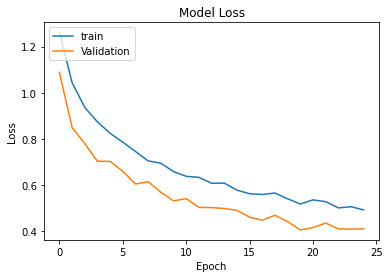

In [79]:
#train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

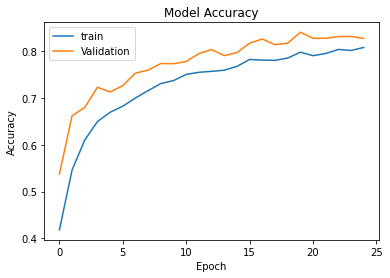

In [82]:
#train and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [87]:
from tensorflow.keras.models import load_model
 
# load model
models = load_model('VGG16.h5')
# summarize model.
models.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [83]:
CLASS_NAMES = list(train_generator.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Found 7470 images belonging to 4 classes.
374/374 [==============================] - 522s 1s/step


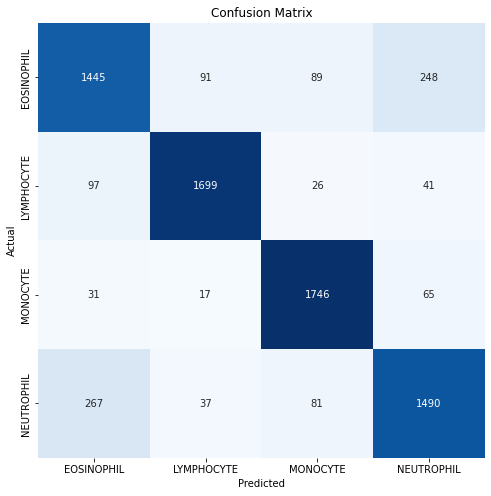

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.79      0.77      0.78      1873
  LYMPHOCYTE       0.92      0.91      0.92      1863
    MONOCYTE       0.90      0.94      0.92      1859
  NEUTROPHIL       0.81      0.79      0.80      1875

    accuracy                           0.85      7470
   macro avg       0.85      0.85      0.85      7470
weighted avg       0.85      0.85      0.85      7470



In [88]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(100, 100),
        shuffle = False,
        batch_size=train_batchsize,
        class_mode='categorical', subset = "training")


predictions = np.argmax(model.predict(train_generator), axis=1)

cm = tf.math.confusion_matrix(train_generator.labels, predictions)
clr = classification_report(train_generator.labels, predictions, target_names=CLASS_NAMES)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 2487 images belonging to 4 classes.
125/125 [==============================] - 175s 1s/step


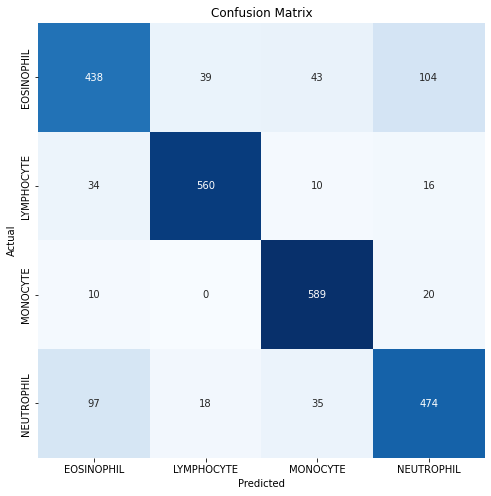

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.76      0.70      0.73       624
  LYMPHOCYTE       0.91      0.90      0.91       620
    MONOCYTE       0.87      0.95      0.91       619
  NEUTROPHIL       0.77      0.76      0.77       624

    accuracy                           0.83      2487
   macro avg       0.83      0.83      0.83      2487
weighted avg       0.83      0.83      0.83      2487



In [90]:
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(100, 100),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
    subset='validation')


predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = tf.math.confusion_matrix(validation_generator.labels, predictions)
clr = classification_report(validation_generator.labels, predictions, target_names=CLASS_NAMES)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 71 images belonging to 4 classes.
4/4 [==============================] - 6s 1s/step


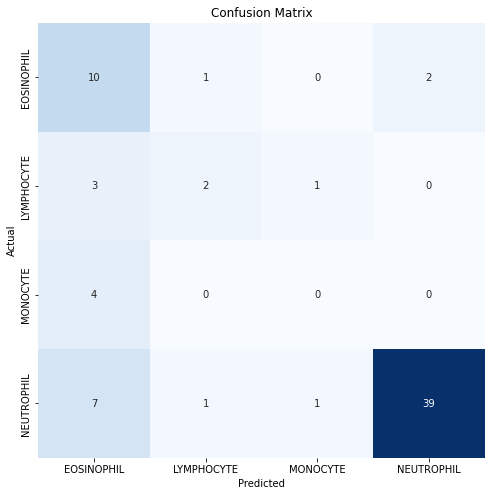

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.42      0.77      0.54        13
  LYMPHOCYTE       0.50      0.33      0.40         6
    MONOCYTE       0.00      0.00      0.00         4
  NEUTROPHIL       0.95      0.81      0.88        48

    accuracy                           0.72        71
   macro avg       0.47      0.48      0.45        71
weighted avg       0.76      0.72      0.73        71



In [94]:
test_sample_generator = validation_datagen.flow_from_directory(
        test_sample_path,
        target_size=(100, 100),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


predictions = np.argmax(model.predict(test_sample_generator), axis=1)

cm = tf.math.confusion_matrix(test_sample_generator.labels, predictions)
clr = classification_report(test_sample_generator.labels, predictions, target_names=CLASS_NAMES)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# prediction

In [98]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/_1_4511.jpeg"



img = image.load_img(file, target_size=(100, 100))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [99]:
prediction_prob = np.argmax(models.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 55ms/step
2
MONOCYTE


Reference : (https://www.kaggle.com/code/kbrans/vgg16-model-83-36-acc)